In [2]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.0.1'

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"What device is being used: {device}")

What device is being used: cpu


6.1 Data

In [4]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight * X + bias # Linear Regression formula
X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Spit the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
        Plot training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exists
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

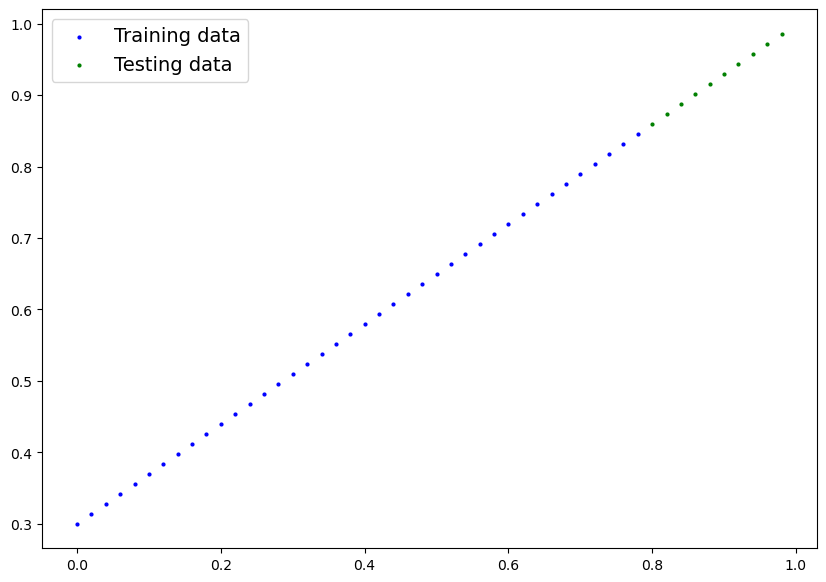

In [7]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

In [8]:
# Building a linear model by subclass nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear for creating the model parameters
        # using layers, this creates the forward pass and the parameters.
        # also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor)  -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [10]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [11]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop
  

In [12]:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [25]:
# Let's write a training loop

# Random seed for consistent numbers
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. Perform back propagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Printing out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.5436569452285767 | Test Loss: 0.5605052709579468
Epoch: 10 | Loss: 0.42844706773757935 | Test Loss: 0.42579537630081177
Epoch: 20 | Loss: 0.31323719024658203 | Test Loss: 0.2910855710506439
Epoch: 30 | Loss: 0.1980273276567459 | Test Loss: 0.1563757359981537
Epoch: 40 | Loss: 0.0828174576163292 | Test Loss: 0.021665919572114944
Epoch: 50 | Loss: 0.023356426507234573 | Test Loss: 0.048834484070539474
Epoch: 60 | Loss: 0.019609851762652397 | Test Loss: 0.04538799077272415
Epoch: 70 | Loss: 0.01618141308426857 | Test Loss: 0.03711546212434769
Epoch: 80 | Loss: 0.012742981314659119 | Test Loss: 0.028842901811003685
Epoch: 90 | Loss: 0.009307924658060074 | Test Loss: 0.02125726267695427
Epoch: 100 | Loss: 0.0058781662955880165 | Test Loss: 0.012984687462449074
Epoch: 110 | Loss: 0.002439358038827777 | Test Loss: 0.004712158348411322
Epoch: 120 | Loss: 0.010256483219563961 | Test Loss: 0.0003308236482553184
Epoch: 130 | Loss: 0.010256483219563961 | Test Loss: 0.00033082364

In [26]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [27]:
# Turn model into eval mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

In [28]:
y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

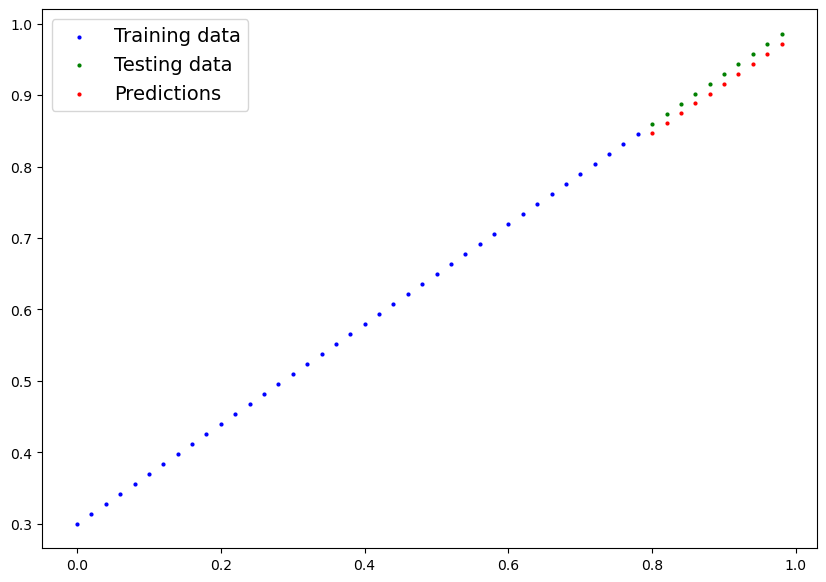

In [29]:
# Check predictions visually
plot_predictions(predictions=y_preds)